<a href="https://colab.research.google.com/github/fuserkuba/HackerRank/blob/master/LaptopBatteryLife/HR_Laptop_Battery_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np

path='https://raw.githubusercontent.com/fuserkuba/HackerRank/master/LaptopBatteryLife/'

# CHANGE UPLOADED FILE NAME!
input_file=path+'trainingdata.txt'


# **READING INPUT**

In [15]:
df=pd.read_csv(input_file, sep=',',header=None,names=["charged","lasted"])
#df.info

<bound method DataFrame.info of     charged  lasted
0      2.81    5.62
1      7.14    8.00
2      2.72    5.44
3      3.87    7.74
4      1.90    3.80
..      ...     ...
95     4.38    8.00
96     8.06    8.00
97     8.05    8.00
98     1.10    2.20
99     6.65    8.00

[100 rows x 2 columns]>

# **EXPLORATORY DATA ANALYSIS**

charged    float64
lasted     float64
dtype: object
<bound method DataFrame.info of     charged  lasted
0      2.81    5.62
1      7.14    8.00
2      2.72    5.44
3      3.87    7.74
4      1.90    3.80
..      ...     ...
95     4.38    8.00
96     8.06    8.00
97     8.05    8.00
98     1.10    2.20
99     6.65    8.00

[100 rows x 2 columns]>
          charged      lasted
count  100.000000  100.000000
mean     4.573000    6.206800
std      2.788603    2.454116
min      0.000000    0.000000
25%      1.987500    3.975000
50%      4.375000    8.000000
75%      6.522500    8.000000
max     11.720000    8.000000


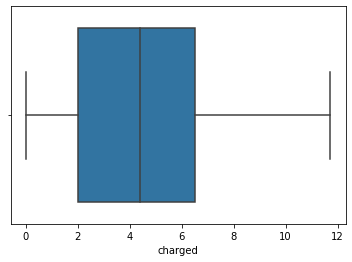

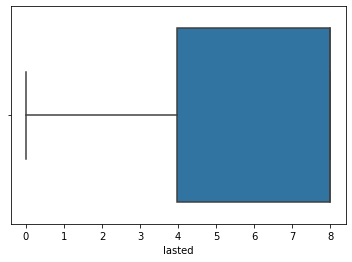

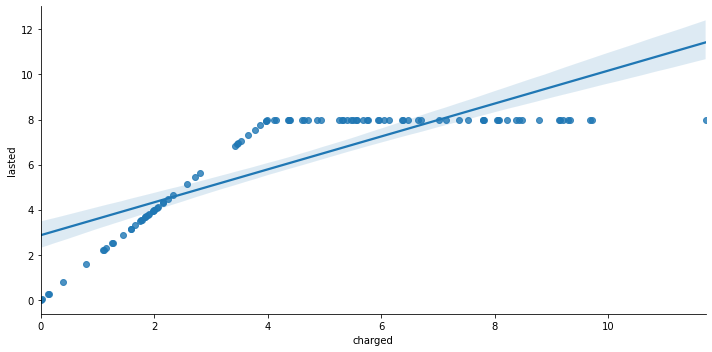

In [26]:
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

print(df.dtypes)
print(df.info)
print(df.describe())

x_column='charged'
y_column='lasted'

plt.show(sns.boxplot(x=df[x_column]))
plt.show(sns.boxplot(x=df[y_column]))

sns.lmplot(x=x_column,y=y_column,data=df,aspect=2)

The data it is completely linear until 4 charging hours, with more than 4 charging hours the battery always last 8 hours

# **PREPARE TRAIN AND TEST DATA**

In [52]:
df_train=df[df['lasted']< 8]

X_train=df_train.values[:,0].reshape(-1, 1)
y_train=df_train.values[:,1].reshape(-1, 1)
X_test=np.array([0.09]).reshape(-1, 1)

print(df_train.info())
print(X_train[:10],X_train.shape)
print(y_train[:10],y_train.shape)
print(X_test[:10],X_test.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 98
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   charged  46 non-null     float64
 1   lasted   46 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB
None
[[2.81]
 [2.72]
 [3.87]
 [1.9 ]
 [0.14]
 [2.  ]
 [0.8 ]
 [0.  ]
 [1.78]
 [3.45]] (46, 1)
[[5.62]
 [5.44]
 [7.74]
 [3.8 ]
 [0.28]
 [4.  ]
 [1.6 ]
 [0.  ]
 [3.56]
 [6.9 ]] (46, 1)
[[0.09]] (1, 1)


# **TRAIN MODEL**

In [50]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **TEST MODEL**

In [59]:
#print(y_predict.shape)
y_predict=model.predict(X_test)

print(round(y_predict[0][0],2))

0.18
